# Ensemble classification and hyperparameter tuning
## Preparations

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # for plot styling

In [3]:
# Read the previously used liver spectroscopy data set
D = pd.read_table('liver-spectroscopy.tab')

# Print the classes
print(D.type.unique())

# Separate the true classes out from the data, into separate variable
types=pd.Categorical(D.type)

['collagen' 'glycogen' 'lipids' 'DNA']


,1801,1797,1793,1789,1785,1781,1778,1774,1770,1766,...,937,933,929,925,921,917,914,910,906,902
223,0.131,0.131,0.132,0.132,0.132,0.134,0.134,0.136,0.138,0.141,...,0.209,0.210,0.210,0.209,0.206,0.203,0.199,0.194,0.191,0.189
431,0.113,0.114,0.114,0.114,0.114,0.115,0.116,0.119,0.123,0.129,...,0.215,0.215,0.214,0.214,0.213,0.212,0.211,0.209,0.206,0.204
626,0.154,0.155,0.156,0.157,0.157,0.158,0.159,0.161,0.163,0.164,...,0.186,0.186,0.185,0.184,0.183,0.181,0.179,0.177,0.174,0.174
547,0.096,0.096,0.096,0.095,0.094,0.094,0.094,0.096,0.101,0.108,...,0.253,0.254,0.255,0.256,0.256,0.256,0.254,0.252,0.250,0.249
544,0.084,0.084,0.084,0.083,0.082,0.083,0.084,0.086,0.092,0.099,...,0.248,0.248,0.249,0.250,0.249,0.248,0.245,0.242,0.240,0.238
106,0.155,0.156,0.156,0.157,0.158,0.159,0.159,0.160,0.162,0.163,...,0.191,0.190,0.189,0.187,0.186,0.184,0.181,0.178,0.176,0.175
214,0.148,0.149,0.149,0.150,0.150,0.151,0.152,0.154,0.157,0.158,...,0.196,0.196,0.195,0.193,0.190,0.186,0.182,0.178,0.174,0.172
666,0.143,0.144,0.144,0.145,0.146,0.147,0.148,0.149,0.152,0.155,...,0.200,0.200,0.200,0.199,0.197,0.196,0.193,0.191,0.188,0.185
267,0.099,0.100,0.100,0.099,0.099,0.100,0.101,0.103,0.104,0.105,...,0.212,0.215,0.216,0.214,0.211,0.206,0.201,0.196,0.193,0.191
511,0.111,0.111,0.112,0.111,0.111,0.112,0.114,0.116,0.123,0.136,...,0.204,0.204,0.204,0.205,0.206,0.205,0.203,0.201,0.199,0.197


<Axes: >

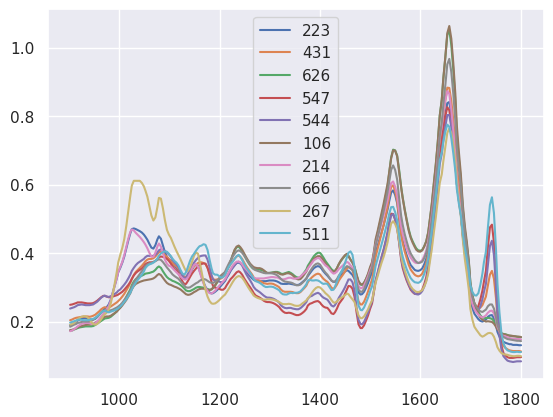

In [4]:
# Parse the column index to integer wavelengths using a lambda-function
wl=D.columns[:-1].map(lambda x: int(float(x)))

# Separate the numerical data from liver spectroscopy to design matrix X
X=D.iloc[:,:-1]

# Assign numerical values to column names, so that the plot is prettier
X.columns=wl

# Print and plot 10 randomly selected samples from the data
sample=X.sample(10)
display(sample)
sample.T.plot()

## Task 1: Apply the extratrees classifier

Import Extratrees classifier from `sklearn.ensemble`, instantiate a classifier with following parameters. 
 - number of estimators = 10
 - maximum depth = 3
 - minimum samples split = 2

When the predictor is trained with these ad-hoc parameters, study its performance with following 5 methods

 1. Styled confusion matrix: `display(pd.crosstab(....))`
 3. Accuracy: `print(metrics.accuracy_score(...))`
 4. More accuracy measures: `print(metrics.classification_report(...))`
 5. Check accuracy with cross validation: `print(cross_val_score(...))` using three-fold cross validation
 6. Calculate the mean of cross validation results over all folds

You can check what recall and f1-score means from SKlearn documentation, page [Precision-Recall](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html)

You can import [Extratrees classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html#sklearn.ensemble.ExtraTreesClassifier) from [sklearn.ensemble](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble) Import also [metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) from sklearn since it contains all important classifier metrices. And import cross_val_score from [sklearn.model_selection](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection)

Name your variables according to the following table, in order to make the autograder tests to work:

| Variable | Name |
| -------- | ------|
| classifier, estimator | `est` |
| Accuracy | `accuracy` |
| Cross val accuracy | `cv_accuracy` |
| Confusion matrix, made with crosstab | `cm` |

In [5]:
# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 

In [5]:
import sklearn
errorfound=False
require=('est', 'accuracy', 'cv_accuracy', 'cm')
for var in require:
    if var not in globals():
        print(var, "not found! Please define it.")
        errorfound=True

if type(est) != sklearn.ensemble.ExtraTreesClassifier:
    print("The classifier is of wrong type")
    errorfound=1
if not errorfound:
    print("No errrors found this far, your code may work :)")

### BEGIN HIDDEN TESTS 
    points=1
    if abs(accuracy - 0.859) < 0.1:
        points+=1
    if abs(cv_accuracy - 0.936) < 0.1:
        points+=1
    if abs(cm.values.diagonal().sum() -628) < 10:
        points +=1
points
### END HIDDEN TESTS

No errrors found this far, your code may work :)


3

## Task 2, optimize the classifier

Lets try now to find optimal parameters controlling the model (=hyperparameters) for the classifier with grid search CV. Search the parameters:
 - `n_estimators`
 - `max_depth` and
 - `min_samples_split`

Use the previously used extratrees classifier as a starting point

Name your variables according to the following table, in order to make the autograder tests to work:

| Variable | Name |
| -------- | ------|
| Tunable parameters structure | `params` |
| Grid search object | `cv_est` |

In [6]:
# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 

In [8]:
errorfound=False
require=('params', 'cv_est')
for var in require:
    if var not in globals():
        print(var, "not found! Please define it.")
        errorfound=True
        
### BEGIN HIDDEN TESTS
points=1
print(cv_est)
oest = cv_est.best_estimator_
if type(oest) != sklearn.ensemble.ExtraTreesClassifier:
    print("The classifier is of wrong type")
    errorfound=1
else:
    points +=1
if (type(params) != list) or (type(params[0]) != dict):
    print("The parameter list is of wrong type")
    errorfound=1
else:
    points +=1
points
### END HIDDEN TESTS

GridSearchCV(cv=3, estimator=ExtraTreesClassifier(max_depth=3, n_estimators=10),
             param_grid=[{'max_depth': range(1, 5),
                          'min_samples_split': range(2, 5),
                          'n_estimators': range(5, 20)}])


3

## Task 3

Having trained your estimator, check what where the optimal parameters, and compare the CV-accuracy with the previous model and plot the confusion matrix with crosstab as well. Did it improve?

Notice that you will find the optimised estimator as `cv_est.best_estimator_`, and you can see all its parameters with `est_opt.get_params()`.

Name your variables according to the following table, in order to make the autograder tests to work:

| Variable | Name |
| -------- | ------|
| Optimal, tuned predictor | `est_opt` |
| Cross validation accuracy | `cv_opt` |
| Confusion matrix  | `cm_opt` |

In [7]:
# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 

In [15]:
errorfound=False
require=('est_opt', 'cv_opt', 'cm_opt')
for var in require:
    if var not in globals():
        print(var, "not found! Please define it.")
        errorfound=True
        
### BEGIN HIDDEN TESTS
points=1
print(cv_opt)
if abs(cv_opt - 0.859) < 0.1:
    points+=1
else:
    print(f"Accuracy {cv_opt} is not ok")
if abs(cm_opt.values.diagonal().sum() - 711) < 10:
    points +=1
else:
    print(f"Diagonal sum {cm_opt.values.diagonal().sum()} is not ok")
points
### END HIDDEN TESTS

0.9384964806944162


3